In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


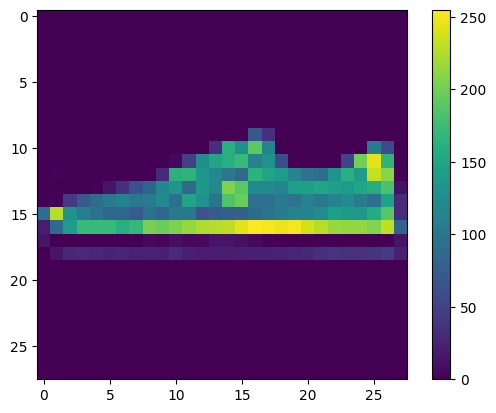

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[14])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Convert grayscale images to RGB format
train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, axis=-1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, axis=-1))

# Resize images to fit VGG16 input shape
train_images = tf.image.resize(train_images, [48, 48])
test_images = tf.image.resize(test_images, [48, 48])

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze convolutional base
base_model.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Create model architecture
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/2
1875/1875 [==============================] - 32s 15ms/step - loss: 0.7985 - accuracy: 0.7982 - val_loss: 0.5186 - val_accuracy: 0.8184
Epoch 2/2
313/313 [==============================] - 4s 12ms/step - loss: 0.4679 - accuracy: 0.8371
Test accuracy: 0.8371000289916992


In [ ]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 4s 12ms/step


array([1.4636300e-05, 1.1558919e-08, 4.7197130e-08, 6.4807741e-06,
       2.3497946e-06, 5.5367302e-05, 8.5572410e-06, 6.3955081e-03,
       7.7504592e-06, 9.9350935e-01], dtype=float32)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import numpy as np
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

Pick a number: 299
1/1 [==============================] - 0s 93ms/step


Bag


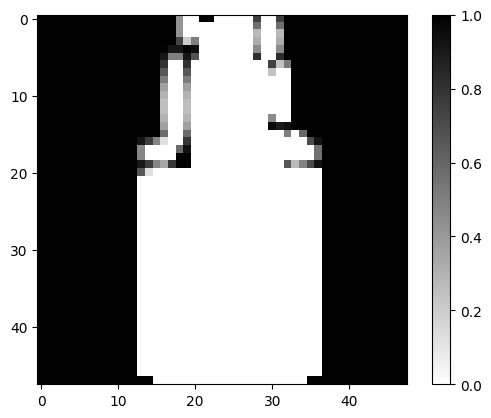

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  print(class_names[correct_label])
  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
